<a href="https://colab.research.google.com/github/Rajit13/My-Project-Works/blob/main/RadMech_BDOAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get update
!sudo apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,944 kB]
Get:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:13 http://security

In [ ]:
# Configure font and text settings
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})

# Equilirbium Temperature

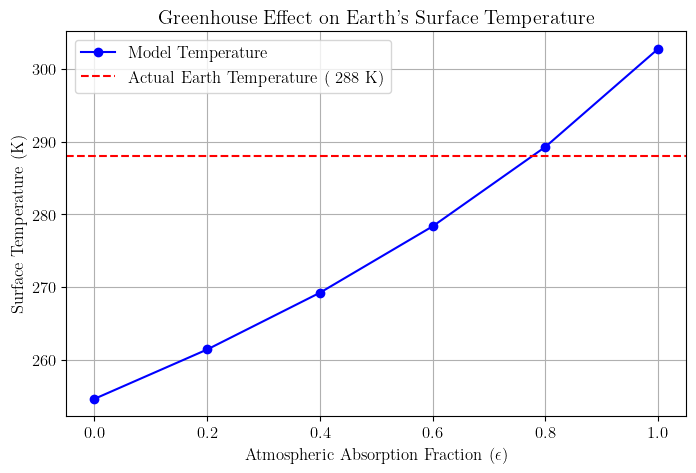

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L0 = 3.828e26          # Solar luminosity (W)
alpha = 0.3            # Albedo
d_ES = 1.496e11        # Earth-Sun distance (m)
sigma = 5.670e-8       # Stefan-Boltzmann constant (W m^-2 K^-4)

def compute_temp(epsilon):
    numerator = L0 * (1 - alpha)
    denominator = 8 * np.pi * sigma * d_ES**2 * (2 - epsilon)
    return (numerator / denominator)**0.25

epsilon_values = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
temps = compute_temp(epsilon_values)

plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, temps, 'bo-', label='Model Temperature')
plt.axhline(y=288, color='r', linestyle='--', label='Actual Earth Temperature (~288 K)')
plt.xlabel('Atmospheric Absorption Fraction ($\epsilon$)')
plt.ylabel('Surface Temperature (K)')
plt.title('Greenhouse Effect on Earth\'s Surface Temperature')
plt.legend()
plt.grid(True)
plt.show()

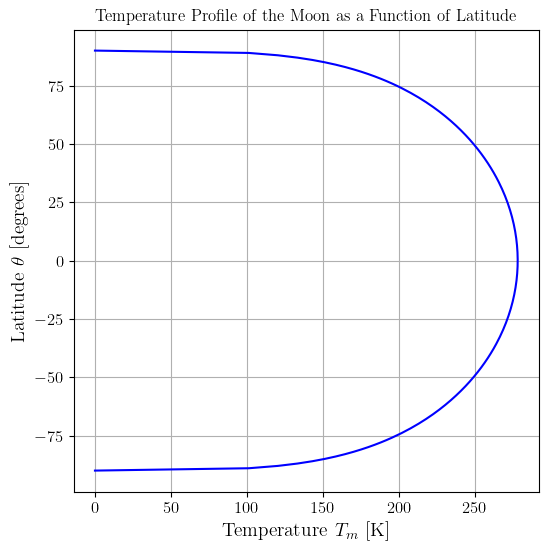

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
A_b = 0.3  # Albedo
epsilon = 0.7  # Emissivity
L_sun = 3.828e26  # Luminosity of the Sun in W
sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
a = 2* 1.496e11  # Distance from Sun to Moon (1 AU) in meters

# Calculate the constant term
constant_term = ((1 - A_b) / epsilon * L_sun / (4 * np.pi * sigma * a**2))**(1 / 4)

# Latitude array from -90 (South Pole) to +90 (North Pole)
theta_degrees = np.linspace(-90, 90, 180)
theta_radians = np.radians(theta_degrees)

# Configure font and text settings
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})


# Temperature calculation
T_m = constant_term * np.cos(theta_radians)**(1 / 4)

# Plotting with inverted axes
plt.figure(figsize=(6, 6))
plt.plot(T_m, theta_degrees, color='blue', linewidth=1.5)
plt.xlabel(r'Temperature $T_m$ [K]', fontsize=14)
plt.ylabel(r'Latitude $\theta$ [degrees]', fontsize=14)
plt.title('Temperature Profile of the Moon as a Function of Latitude', fontsize=12)
plt.grid()

# Display the plot
plt.show()


# Habitable Zone

In [ ]:
import numpy as np

# Constants
L_solar = 3.828e26  # Solar luminosity in Watts
A = 0.3  # Earth's average albedo
sigma = 5.67e-8  # Stefan-Boltzmann constant in W/m^2/K^4

# Temperatures in Kelvin
T_min = 273  # Lower temperature bound for habitable zone (D_max)
T_max = 373  # Upper temperature bound for habitable zone (D_min)

# Calculate D_max and D_min in meters for 1 solar luminosity
D_max = np.sqrt((L_solar * (1 - A)) / (16 * np.pi * sigma * T_min**4))
D_min = np.sqrt((L_solar * (1 - A)) / (16 * np.pi * sigma * T_max**4))

# Convert distances to astronomical units (1 AU = 1.496e11 meters)
D_max_AU = D_max / 1.496e11
D_min_AU = D_min / 1.496e11

D_max, D_min, D_max_AU, D_min_AU


(np.float64(130101778475.9753),
 np.float64(69693273494.64139),
 np.float64(0.8696642946255033),
 np.float64(0.4658641276379772))

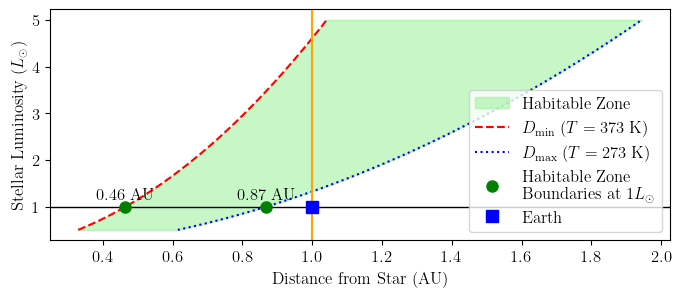

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
A = 0.3  # Earth's average albedo
sigma = 5.67e-8  # Stefan-Boltzmann constant in W/m^2/K^4
L_sun = 3.828e26  # Solar luminosity in Watts

# Define the range for stellar luminosity in units of Watts
L_range = np.linspace(0.5, 5, 500) * L_sun

# Define temperatures for habitable zone boundaries
T_min = 273  # K, lower boundary temperature (for D_max)
T_max = 373  # K, upper boundary temperature (for D_min)

# Calculate distances for D_min and D_max as a function of stellar luminosity
D_min = np.sqrt((L_range * (1 - A)) / (16 * np.pi * sigma * T_max**4)) / 1.496e11  # Convert to AU
D_max = np.sqrt((L_range * (1 - A)) / (16 * np.pi * sigma * T_min**4)) / 1.496e11  # Convert to AU

# Find the values of D_min and D_max at 1 solar luminosity
L_index = np.argmin(np.abs(L_range / L_sun - 1))  # Find index closest to 1 L_sun
D_min_at_L_sun = D_min[L_index]
D_max_at_L_sun = D_max[L_index]

# Plotting
plt.figure(figsize=(8, 3))

# Shading the habitable zone between D_min and D_max
plt.fill_betweenx(L_range / L_sun, D_min, D_max, color='lightgreen', alpha=0.5, label='Habitable Zone')
plt.plot(D_min, L_range / L_sun, color='red', linestyle='--', label=r'$D_{\rm min}\; (T= 373 \;\rm K)$')
plt.plot(D_max, L_range / L_sun, color='blue', linestyle=':', label=r'$D_{\rm max}\; (T= 273\; \rm K)$')

# Mark the points where the habitable zone intersects 1 solar luminosity
plt.plot([D_min_at_L_sun, D_max_at_L_sun], [1, 1], 'go', markersize=8,zorder=3, label='Habitable Zone \n Boundaries at $1 L_\odot$')
plt.text(D_min_at_L_sun, 1.15, f"{D_min_at_L_sun:.2f} AU", ha='center', color='black')
plt.text(D_max_at_L_sun, 1.15, f"{D_max_at_L_sun:.2f} AU", ha='center', color='black')

# Add a line for Earth's orbit at 1 AU
plt.axvline(x=1, color='orange', linestyle='-', linewidth=1.5) #, label="Earth's Orbit"

# Add a horizontal line at 1 solar luminosity
plt.axhline(y=1, color='black', linestyle='-', linewidth=1) #, label="Solar Luminosity

# Mark Earth's position on the plot
plt.plot(1, 1, 'bs', markersize=8, label="Earth")

# Axis labels and title
plt.xlabel('Distance from Star (AU)')
plt.ylabel('Stellar Luminosity ($L_\odot$)')
#plt.title('Habitable Zone as a Function of Stellar Luminosity')
plt.legend()
plt.grid(False)
plt.savefig('habitz.pdf',bbox_inches='tight', format='pdf')
plt.show()


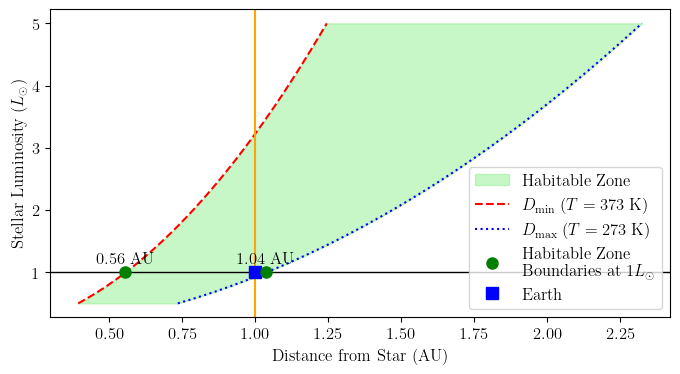

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
A = 0.3  # Earth's average albedo
sigma = 5.67e-8  # Stefan-Boltzmann constant in W/m^2/K^4
L_sun = 3.828e26  # Solar luminosity in Watts

# Define the range for stellar luminosity in units of Watts
L_range = np.linspace(0.5, 5, 500) * L_sun

# Define temperatures for habitable zone boundaries
T_min = 273  # K, lower boundary temperature (for D_max)
T_max = 373  # K, upper boundary temperature (for D_min)

# Calculate distances for D_min and D_max as a function of stellar luminosity
D_min = np.sqrt((L_range ) / (16 * np.pi * sigma * T_max**4)) / 1.496e11  # Convert to AU
D_max = np.sqrt((L_range) / (16 * np.pi * sigma * T_min**4)) / 1.496e11  # Convert to AU

# Find the values of D_min and D_max at 1 solar luminosity
L_index = np.argmin(np.abs(L_range / L_sun - 1))  # Find index closest to 1 L_sun
D_min_at_L_sun = D_min[L_index]
D_max_at_L_sun = D_max[L_index]

# Plotting
plt.figure(figsize=(8, 4))

# Shading the habitable zone between D_min and D_max
plt.fill_betweenx(L_range / L_sun, D_min, D_max, color='lightgreen', alpha=0.5, label='Habitable Zone')
plt.plot(D_min, L_range / L_sun, color='red', linestyle='--', label=r'$D_{\rm min}\; (T= 373 \;\rm K)$')
plt.plot(D_max, L_range / L_sun, color='blue', linestyle=':', label=r'$D_{\rm max}\; (T= 273\; \rm K)$')

# Mark the points where the habitable zone intersects 1 solar luminosity
plt.plot([D_min_at_L_sun, D_max_at_L_sun], [1, 1], 'go', markersize=8,zorder=3, label='Habitable Zone \n Boundaries at $1 L_\odot$')
plt.text(D_min_at_L_sun, 1.15, f"{D_min_at_L_sun:.2f} AU", ha='center', color='black')
plt.text(D_max_at_L_sun, 1.15, f"{D_max_at_L_sun:.2f} AU", ha='center', color='black')

# Add a line for Earth's orbit at 1 AU
plt.axvline(x=1, color='orange', linestyle='-', linewidth=1.5) #, label="Earth's Orbit"

# Add a horizontal line at 1 solar luminosity
plt.axhline(y=1, color='black', linestyle='-', linewidth=1) #, label="Solar Luminosity

# Mark Earth's position on the plot
plt.plot(1, 1, 'bs', markersize=8, label="Earth")

# Axis labels and title
plt.xlabel('Distance from Star (AU)')
plt.ylabel('Stellar Luminosity ($L_\odot$)')
#plt.title('Habitable Zone as a Function of Stellar Luminosity')
plt.legend()
plt.grid(False)
plt.savefig('habitz.pdf',bbox_inches='tight', format='pdf')
plt.show()


# Green House Model

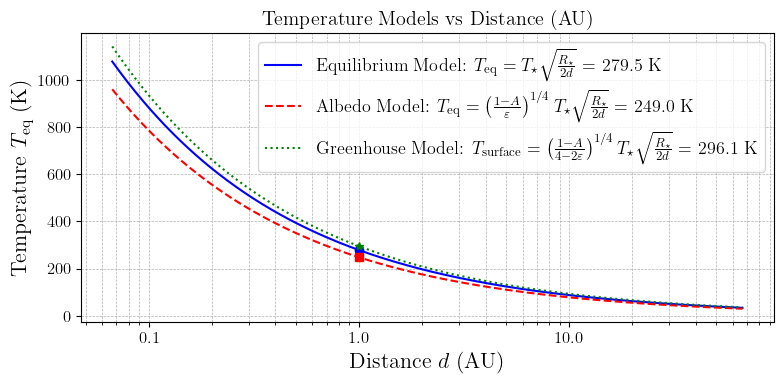

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Constants
T_sun = 5778  # Temperature of the Sun in Kelvin
R_sun = 6.96e8  # Radius of the Sun in meters
S = 1361  # Solar constant in W/m^2
sigma = 5.67e-8  # Stefan-Boltzmann constant in W/(m^2 K^4)
A = 0.37  # Albedo
epsilon = 1 # Emissivity
AU_in_meters = 1.496e11  # 1 AU in meters

# Distance range in meters, converted to AU
d = np.logspace(10, 13, 500)  # Distance in meters
d_AU = d / AU_in_meters  # Convert distance to AU

# Equilibrium Temperature Calculations
# Basic model without albedo or emissivity
T_eq_basic = T_sun * np.sqrt(R_sun / (2 * d))

# Adjusted model with albedo and emissivity
T_eq_adjusted = ((1 - A) / epsilon) ** (1 / 4) * T_sun * np.sqrt(R_sun / (2 * d))

# Solar luminosity (L_star)
L_star = 4 * np.pi * R_sun**2 * sigma * T_sun**4

# Surface Temperature Model (new equation)
T_surface = ((1 - A) / (4 - 2* epsilon))**(1 / 4) * (R_sun / d)**(1 / 2) * T_sun

# Adding annotation for T_eq at Earth's position (1 AU)
earth_distance_AU = 1  # Earth's distance from the Sun in AU
earth_index = np.argmin(np.abs(d_AU - earth_distance_AU))  # Closest index to 1 AU

# Values at Earth's distance
T_eq_basic_earth = T_eq_basic[earth_index]
T_eq_adjusted_earth = T_eq_adjusted[earth_index]
T_surface_earth = T_surface[earth_index]

# Plotting with annotations
plt.figure(figsize=(8, 4))

# Basic model
plt.plot(d_AU, T_eq_basic, color='blue', linestyle='-',
         label=f'Equilibrium Model: $T_{{\\rm eq}}=T_\\star \\sqrt{{\\frac{{R_\\star}}{{2d}}}}$ = {T_eq_basic_earth:.1f} K')
plt.plot(earth_distance_AU, T_eq_basic_earth, 'bo')  # Mark Earth's distance

# Adjusted model with albedo and emissivity
plt.plot(d_AU, T_eq_adjusted, color='red', linestyle='--',
         label=f'Albedo Model: $T_{{\\rm eq}}=\\left( \\frac{{1-A}}{{\\varepsilon}} \\right)^{{1/4}} T_\\star \\sqrt{{\\frac{{R_\\star}}{{2d}}}}$ = {T_eq_adjusted_earth:.1f} K')
plt.plot(earth_distance_AU, T_eq_adjusted_earth, 'rs')  # Mark Earth's distance

# Surface Temperature Model
plt.plot(d_AU, T_surface, color='green', linestyle=':',
         label=f'Greenhouse Model: $T_{{\\rm surface}}=\\left( \\frac{{1-A}}{{4 - 2 \\varepsilon}} \\right)^{{1/4}} T_\\star \\sqrt{{\\frac{{R_\\star}}{{2d}}}}$ = {T_surface_earth:.1f} K')
plt.plot(earth_distance_AU, T_surface_earth, 'g*')  # Mark Earth's distance

# Plot formatting
plt.xlabel('Distance $d$ (AU)', fontsize=16)
plt.ylabel(r'Temperature $T_{\rm eq}$ (K)', fontsize=16)
plt.xscale('log')
plt.title('Temperature Models vs Distance (AU)')
plt.legend(fontsize=13)
plt.grid(True, which='both', linestyle='--', lw=0.5)

# Adjusting x-axis to use regular values instead of scientific notation
plt.gca().xaxis.set_major_formatter(ScalarFormatter())

plt.tight_layout()
plt.savefig('teq_model.pdf', format='pdf')
plt.show()


Habitable Zone Considering Greenhouse effect

$$
T_\oplus = \left( \frac{L_0 (1 - \alpha)}{16 \pi \sigma d_{ES}^2 (1 - \epsilon/2)} \right)^{1/4} = \left( \frac{L_0 (1 - \alpha)}{8 \pi \sigma d_{ES}^2 (2 - \epsilon)} \right)^{1/4}.$$

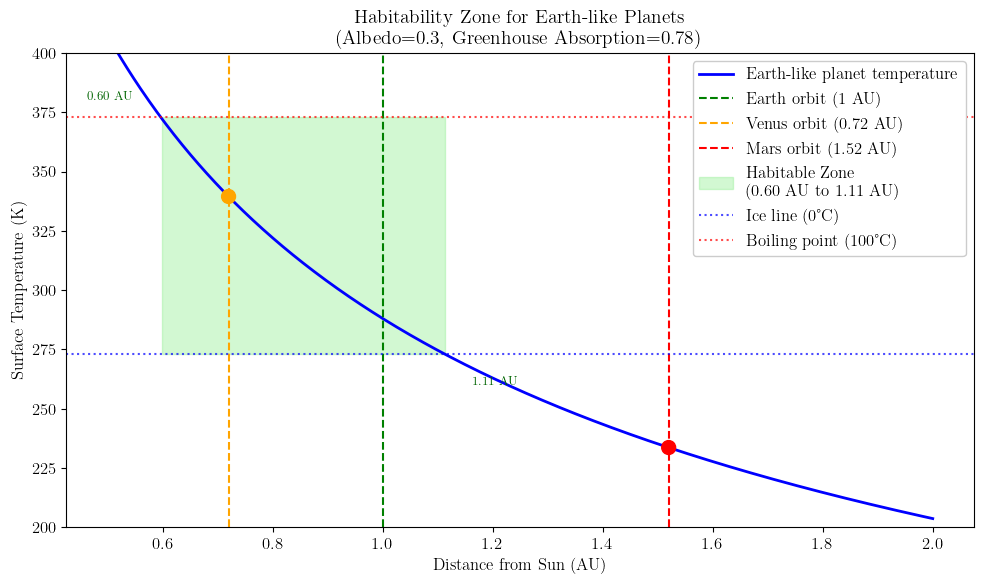

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Constants
L0 = 3.828e26          # Solar luminosity (W)
alpha = 0.3            # Albedo
sigma = 5.670e-8       # Stefan-Boltzmann constant (W m^-2 K^-4)
epsilon = 0.78         # Greenhouse absorption fraction
AU = 1.496e11          # 1 Astronomical Unit in meters

# Function to compute temperature at distance d (in AU)
def compute_temp(d_AU):
    d = d_AU * AU
    numerator = L0 * (1 - alpha)
    denominator = 8 * np.pi * sigma * d**2 * (2 - epsilon)
    return (numerator / denominator)**0.25

# Distance range (0.5 to 2.0 AU)
d_AU = np.linspace(0.5, 2.0, 500)
temps = compute_temp(d_AU)

# Habitable zone boundaries (strictly between 273K and 373K)
liquid_water_max = 373  # 100°C (upper limit)
ice_line_min = 273       # 0°C (lower limit)

# Find precise distances where temperature crosses these thresholds
f = interp1d(temps, d_AU)
d_inner = f(liquid_water_max)  # Inner edge (hotter)
d_outer = f(ice_line_min)      # Outer edge (colder)

# Orbits of Venus and Mars
venus_AU = 0.72
mars_AU = 1.52
venus_temp = compute_temp(venus_AU)
mars_temp = compute_temp(mars_AU)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(d_AU, temps, 'b-', linewidth=2, label='Earth-like planet temperature')

# Vertical lines for planetary orbits
plt.axvline(x=1.0, color='green', linestyle='--', label='Earth orbit (1 AU)')
plt.axvline(x=venus_AU, color='orange', linestyle='--', label='Venus orbit (0.72 AU)')
plt.axvline(x=mars_AU, color='red', linestyle='--', label='Mars orbit (1.52 AU)')

# Highlight habitable zone ONLY between 273K and 373K
plt.fill_between(d_AU, ice_line_min, liquid_water_max,
                 where=(temps >= ice_line_min) & (temps <= liquid_water_max),
                 color='lightgreen', alpha=0.4,
                 label=f'Habitable Zone\n({d_inner:.2f} AU to {d_outer:.2f} AU)')

# Horizontal lines for habitable zone boundaries
plt.axhline(y=ice_line_min, color='blue', linestyle=':', alpha=0.7, linewidth=1.5, label='Ice line (0°C)')
plt.axhline(y=liquid_water_max, color='red', linestyle=':', alpha=0.7, linewidth=1.5, label='Boiling point (100°C)')

# Planetary temperature points
plt.scatter([venus_AU, mars_AU], [venus_temp, mars_temp],
            color=['orange', 'red'], s=100, zorder=5)

# Annotations
plt.text(d_inner-0.05, 380, f'{d_inner:.2f} AU', ha='right', color='darkgreen', fontsize=9)
plt.text(d_outer+0.05, 260, f'{d_outer:.2f} AU', ha='left', color='darkgreen', fontsize=9)

plt.xlabel('Distance from Sun (AU)', fontsize=12)
plt.ylabel('Surface Temperature (K)', fontsize=12)
plt.title('Habitability Zone for Earth-like Planets\n(Albedo=0.3, Greenhouse Absorption=0.78)', fontsize=14)
plt.ylim(200, 400)
plt.legend(loc='upper right', framealpha=1)
plt.tight_layout()
plt.show()

Radiation Pressure

Beta: 0.06374102714020727
Time for the dust grain to fall into the Sun: 134815.26963053926 years


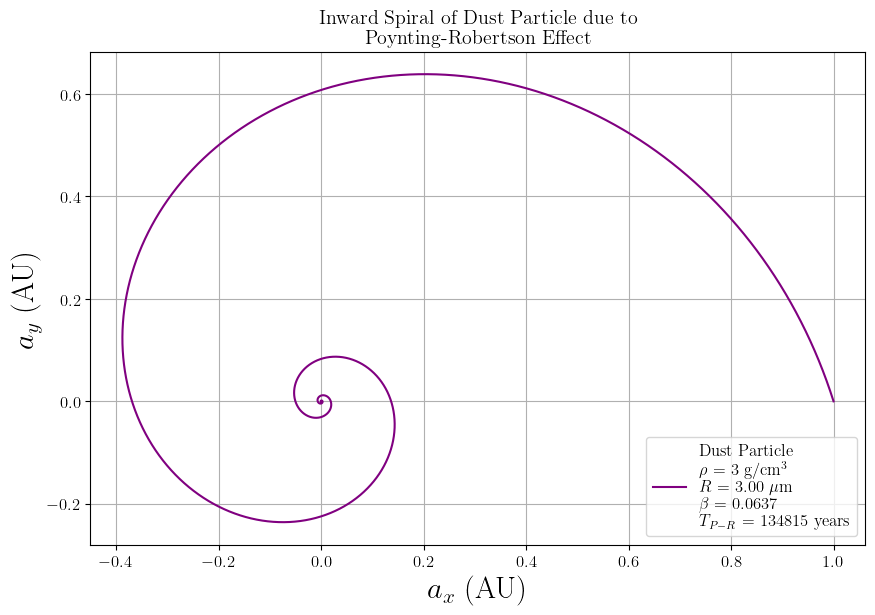

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L_sun = 3.828e26  # Solar luminosity in Watts
c = 3.0e8  # Speed of light in m/s
G = 6.67430e-11  # Gravitational constant in m^3/kg/s^2
M_sun = 1.989e30  # Solar mass in kg
R = 3e-6  # Radius of dust grain in meters
rho = 3 * 1e3  # Density of dust grain in kg/m^3
rho_a = 3  # Density of dust grain in g/cm^3

# Calculate beta
beta = (3 * L_sun) / (16 * np.pi * c * G * M_sun * R * rho)
print("Beta:", beta)

# Simulation parameters
initial_distance_au = 1.0  # Initial distance from the Sun in AU
time_years = np.linspace(0, 500000, 500000)  # Time in years, extended for more realistic fall time
angles = np.linspace(0, 20 * np.pi, 500000)  # Angle for spiral in radians

# Poynting-Robertson time calculation
distance_au = initial_distance_au * np.exp(-time_years / (1600 * (initial_distance_au**2) * (1 / beta)))

# Convert polar coordinates (r, theta) to Cartesian coordinates (x, y)
x = distance_au * np.cos(angles)
y = distance_au * np.sin(angles)

# Find the time when the grain falls into the Sun
fall_time_index = np.where(distance_au <= 0.00465047)[0]  # Distance less than 1 Solar radius in AU
if fall_time_index.size > 0:
    fall_time_years = time_years[fall_time_index[0]]
else:
    fall_time_years = np.nan

print(f"Time for the dust grain to fall into the Sun: {fall_time_years} years")

# Plotting
plt.figure(figsize=(10, 6.4))
plt.plot(x, y, color='purple', linewidth=1.5, label=f'Dust Particle\n$\\rho$ = {rho_a} g/cm$^3$\n$R$ = {R*1e6:.2f} $\\mu$m\n$\\beta$ = {beta:.4f}\n$T_{{P-R}}$ = {fall_time_years:.0f} years')
plt.xlabel(r'$a_x$ (AU)', fontsize=22)
plt.ylabel(r'$a_y$ (AU)', fontsize=22)
plt.title('Inward Spiral of Dust Particle due to \n Poynting-Robertson Effect')
plt.grid()
plt.legend()
plt.axis('equal')
plt.savefig('dust_spiral.pdf', format='pdf')
plt.show()


# Aperture Photometry

In [ ]:
!pip install version_information
%load_ext version_information
import time
import scipy
import matplotlib
import astropy
!pip install photutils
import photutils


now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information scipy, numpy, matplotlib, astropy, photutils, version_information
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")


The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.5 MB/s eta 0:00:00
This notebook was generated at 2025-05-23 23:57:18 (UTC = GMT+0000) 
0 Python     3.11.12 64bit [GCC 11.4.0]
1 IPython    7.34.0
2 OS         Linux 6.1.123+ x86_64 with glibc2.35
3 scipy      1.15.3
4 numpy      2.0.2
5 matplotlib 3.10.0
6 astropy    7.0.2
7 photutils  2.2.0
8 version_information 1.0.4


In [ ]:
from pathlib import Path

import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Circle

%matplotlib inline
# Remove the line with % if you are not using "Notebook".

plt.style.use('default')
rcParams.update({'font.size':12})

from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.aperture import CircularAnnulus as CAn
from photutils.aperture import CircularAperture as CAp

from photutils.centroids import centroid_com

FIGPATH = Path('..') / "figs"

## 1. Aperture Sum Example

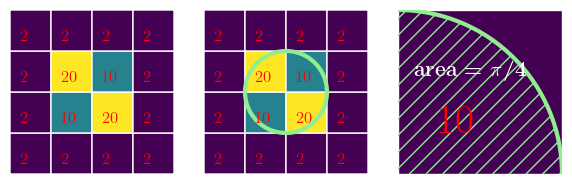

In [ ]:
data = np.array([[2, 2, 2, 2],
                 [2, 10, 20, 2],
                 [2, 20, 10, 2],
                 [2, 2, 2, 2]])
fig, axs = plt.subplots(1, 3, figsize=(6, 2))
# axs[0].imshow(data, alpha=0.3, origin='lower')

for ax in axs.tolist()[:-1]:
    ax.pcolor(data, edgecolors='w', linewidths=1)

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            ax.text(j+0.25, i+0.25, data[i, j], color='r')

aperture = Circle(xy=(2, 2), radius=1, facecolor='none', edgecolor='lightgreen', linewidth=3)
axs[1].add_artist(aperture)

aperture = Circle(xy=(0, 0), radius=1, facecolor='none', hatch='//', edgecolor='lightgreen', linewidth=3)
axs[2].pcolor(data[1:2, 1:2], edgecolors='w', linewidths=1)
axs[2].add_artist(aperture)
axs[2].text(0.1, 0.6, r"\textbf{area = $\pi$/4}", color='w', fontweight='bold', fontsize=15)
axs[2].text(0.25, 0.25, r"10", color='r', fontsize=30)

for ax in axs.tolist():
    ax.axis('off')
    ax.set_aspect('equal')

plt.tight_layout()

[1.5 1.5]


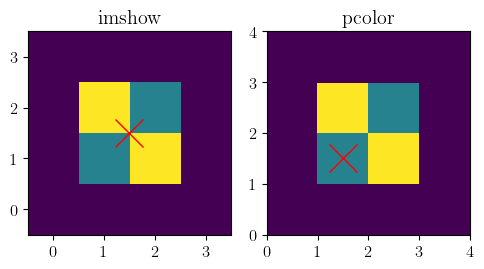

In [ ]:
cent = centroid_com(data)
print(cent)

fig, axs = plt.subplots(1, 2, figsize=(5, 6), sharex=False, sharey=False, gridspec_kw=None)
axs[0].imshow(data, origin='lower')
axs[0].set_title("imshow")
axs[1].pcolor(data)
axs[1].set_title("pcolor")

for ax in axs.tolist():
    ax.plot(*cent, marker='x', ms=20, color='r')
#     ax.axis('off')
    ax.set_aspect('equal')


plt.tight_layout()

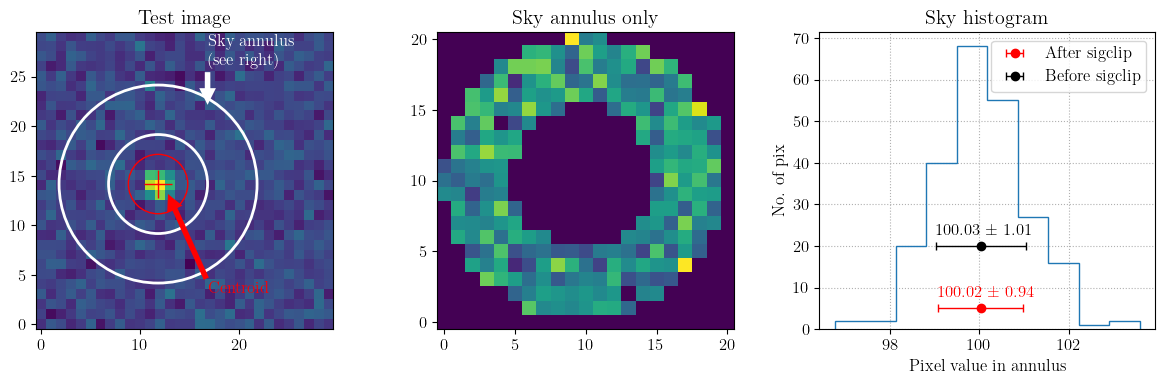

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from photutils.aperture import CircularAperture as CAp, CircularAnnulus as CAn
from photutils.centroids import centroid_com
from astropy.stats import sigma_clipped_stats

np.random.seed(123)
data = 100 + np.random.normal(size=(30,30))
data[13:16, 11:14] += np.array([[5, 10, 5], [9, 12, 8], [6, 9, 5]])

# Background estimation
_, msky, ssky = sigma_clipped_stats(data, sigma=3, maxiters=50, std_ddof=1)
bkgmask = data < (msky + 5 * ssky)
cent = centroid_com(data, mask=bkgmask)

# Aperture definitions
ap = CAp(positions=cent, r=3)  # Source aperture
an = CAn(positions=cent, r_in=5, r_out=10)  # Background annulus

# Sky estimation - FIXED HERE
issky = an.to_mask(method='center')
skyvals = issky.multiply(data)  # Removed [0] since issky is not subscriptable
skyvals_1d = skyvals[skyvals > 0]  # Get only positive values

# Statistics
_, msky, ssky = sigma_clipped_stats(skyvals_1d, sigma=3, maxiters=5, std_ddof=1)
msky_0, ssky_0 = np.median(skyvals_1d), np.std(skyvals_1d, ddof=1)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 4), gridspec_kw={'width_ratios':[1,1,1.]})

# First subplot: Image with apertures
axs[0].imshow(data, origin='lower')
axs[0].plot(*cent, 'r+', ms=20)
ap.plot(ax=axs[0], color='r', lw=1)
an.plot(ax=axs[0], color='w', lw=2)
axs[0].annotate('Sky annulus\n(see right)', xy=cent + [5, 8], xytext=cent + [5, 12],
                color='w', arrowprops=dict(facecolor='w', edgecolor='none'),
                fontweight='bold')
axs[0].annotate("Centroid", xy=cent + [1, -1], xytext=cent + [5, -11], color='r',
               arrowprops=dict(facecolor='r', edgecolor='none'), fontweight='bold')
axs[0].set_title("Test image")

# Second subplot: Sky annulus values
axs[1].imshow(skyvals, vmin=msky-3*ssky, vmax=msky+3*ssky, origin='lower')
axs[1].set_title("Sky annulus only")

# Third subplot: Sky histogram
axs[2].hist(skyvals_1d, histtype='step')
axs[2].set_ylabel("No. of pix")
axs[2].set_xlabel("Pixel value in annulus")
axs[2].grid(ls=':')
axs[2].errorbar(msky, 5, xerr=ssky, ls='', capsize=3, elinewidth=1,
                color='r', marker='o', label="After sigclip")
axs[2].errorbar(msky_0, 20, xerr=ssky_0, ls='', capsize=3, elinewidth=1,
                color='k', marker='o', label="Before sigclip")
axs[2].text(msky-ssky, 8, f"{msky:.2f} ± {ssky:.2f}", color='r')
axs[2].text(msky_0-ssky_0, 23, f"{msky_0:.2f} ± {ssky_0:.2f}", color='k')
axs[2].legend()
axs[2].set_title("Sky histogram")

# Formatting
for ax in axs[:-1]:  # Changed to standard slicing (no tolist needed)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

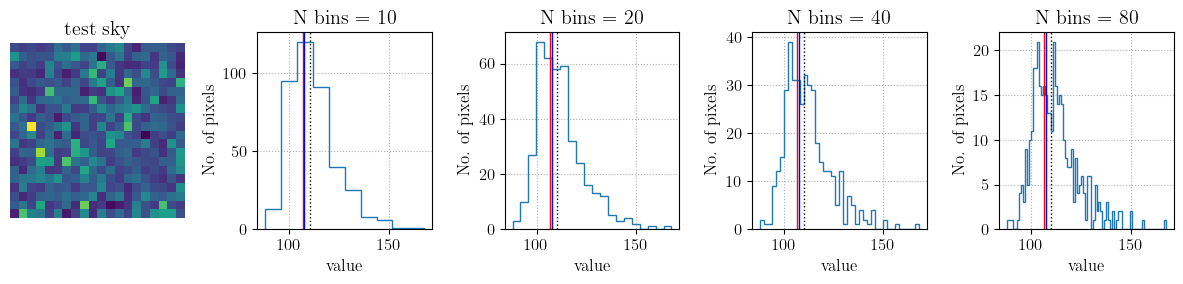

In [ ]:
np.random.seed(123)
data = 100
size = (20, 20)
data += 1 * np.random.normal(loc=0, scale=5, size=size)
data += 5 * np.random.chisquare(df=2, size=size)
data += 3 * np.random.rand(*size)
data_1d = data.ravel()

nbins = [10, 20, 40, 80]
fig, axs = plt.subplots(1, 5, figsize=(12, 3))

for i, ax in enumerate(axs.tolist()[1:]):
    ax.grid(which='major', ls=':')
    ax.set_xlabel("value")
    ax.set_ylabel("No. of pixels")
    ax.set_title(f"N bins = {nbins[i]}")
    ax.hist(data_1d, histtype='step', bins=nbins[i])
    ax.axvline(np.median(data_1d), lw=1, color='k', ls=':')
    ax.axvline(3 * np.median(data_1d) - 2 * np.mean(data_1d), lw=1, color='r', ls='-')
    ax.axvline(2.5 * np.median(data_1d) - 1.5 * np.mean(data_1d), lw=1, color='b', ls='-')

#     ax.set_xlim(100, 150)

axs[0].imshow(data, origin='lower')
axs[0].set_title("test sky")
axs[0].axis('off')


plt.tight_layout()

GAINDL                         / Pixel integration time, in sequencer clocks     [astropy.io.fits.card]
GAINDL                         / Pixel integration time, in sequencer clocks    
PIXITIME                       / Pixel integration time, in seconds              [astropy.io.fits.card]
PIXITIME                       / Pixel integration time, in seconds             
TSHSHUT                        / Master IC reportsshutter close time             [astropy.io.fits.card]
TSHSHUT                        / Master IC reportsshutter close time            
CHOP                           / Chiller Cooling On or Off                       [astropy.io.fits.card]
CHOP                           / Chiller Cooling On or Off                      
CHSET                          / Chiller Set Point Temperature in degrees C      [astropy.io.fits.card]
CHSET                          / Chiller Set Point Temperature in degrees C     
CHPROC                         / Chiller Protection Temperature in degrees 

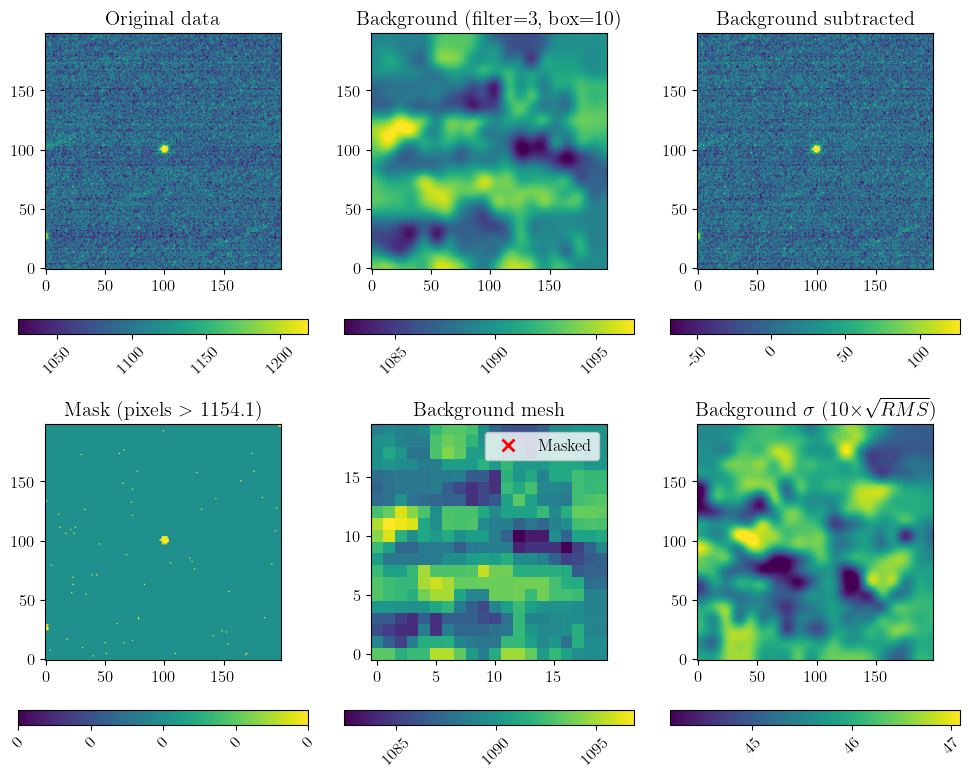

In [ ]:
from photutils.background import Background2D
from astropy.stats import SigmaClip
from astropy.visualization import ZScaleInterval, ImageNormalize
from astropy.io import fits
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

def colorbaring(fig, ax, im):
    cb = fig.colorbar(im, ax=ax, orientation='horizontal')
    cb.ax.set_xticklabels(cb.get_ticks().astype(int), rotation=45)

def znorm(image):
    return ImageNormalize(image, interval=ZScaleInterval())

def zimshow(ax, image, **kwargs):
    return ax.imshow(image, norm=znorm(image), origin='lower', **kwargs)

# Parameters
box = 10
filt = 3
mask_size = 6

# File paths (Colab compatible)
fpath = Path("/content/20180413SAAO_targ.fits")  # Convert to Path immediately
bkg_path = fpath.parent / (fpath.stem + '_bkg.png')
png_path = fpath.parent / (fpath.stem + '.png')

# Load data
hdu = fits.open(fpath)[0]
data = hdu.data
cent_x, cent_y = np.array(data.shape) - 0.5

# Create mask
mask = np.zeros_like(data).astype(bool)
xmin = np.around(cent_x - mask_size / 2).astype(int)
xmax = np.around(cent_x + mask_size / 2).astype(int)
ymin = np.around(cent_y - mask_size / 2).astype(int)
ymax = np.around(cent_y + mask_size / 2).astype(int)
mask[ymin:ymax, xmin:xmax] = True

# Additional masking of bright sources
avg, med, std = sigma_clipped_stats(data, sigma=3, maxiters=5)
thresh = med + 3 * std
possible_src = (data > thresh)
mask = np.logical_or(mask, possible_src)

# Background estimation
bkg_sex = Background2D(data,
                      box_size=box,
                      mask=mask,
                      filter_size=filt,
                      sigma_clip=SigmaClip(sigma=3, maxiters=5))
skysub = data - bkg_sex.background

# Create figure
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

# Original data
im1 = zimshow(axs[0,0], data)
colorbaring(fig, axs[0,0], im1)

# Background model
im2 = zimshow(axs[0,1], bkg_sex.background)
colorbaring(fig, axs[0,1], im2)

# Background-subtracted data
im3 = zimshow(axs[0,2], skysub)
colorbaring(fig, axs[0,2], im3)

# Mask
im4 = zimshow(axs[1,0], mask.astype(int))  # Convert bool to int for visualization
colorbaring(fig, axs[1,0], im4)

# Background mesh with masked points
im5 = zimshow(axs[1,1], bkg_sex.background_mesh)

# Handle both old and new Photutils versions
if hasattr(bkg_sex, 'background_mesh_ma'):
    # Old version (masked array)
    y_masked, x_masked = np.where(bkg_sex.background_mesh_ma.mask)
else:
    # New version (NaN values)
    y_masked, x_masked = np.where(np.isnan(bkg_sex.background_mesh))

axs[1,1].plot(x_masked, y_masked, 'rx', ms=8, mew=2, label='Masked')
colorbaring(fig, axs[1,1], im5)
axs[1,1].legend()

# Background RMS
im6 = zimshow(axs[1,2], 10 * np.sqrt(bkg_sex.background_rms))
colorbaring(fig, axs[1,2], im6)

# Titles
axs[0,0].set_title("Original data")
axs[0,1].set_title(f"Background (filter={filt}, box={box})")
axs[0,2].set_title("Background subtracted")
axs[1,0].set_title(rf"Mask (pixels $>$ {thresh:.1f})")
axs[1,1].set_title("Background mesh")
axs[1,2].set_title("Background $\sigma$ (10×$\sqrt{RMS}$)")

plt.tight_layout()
plt.show()

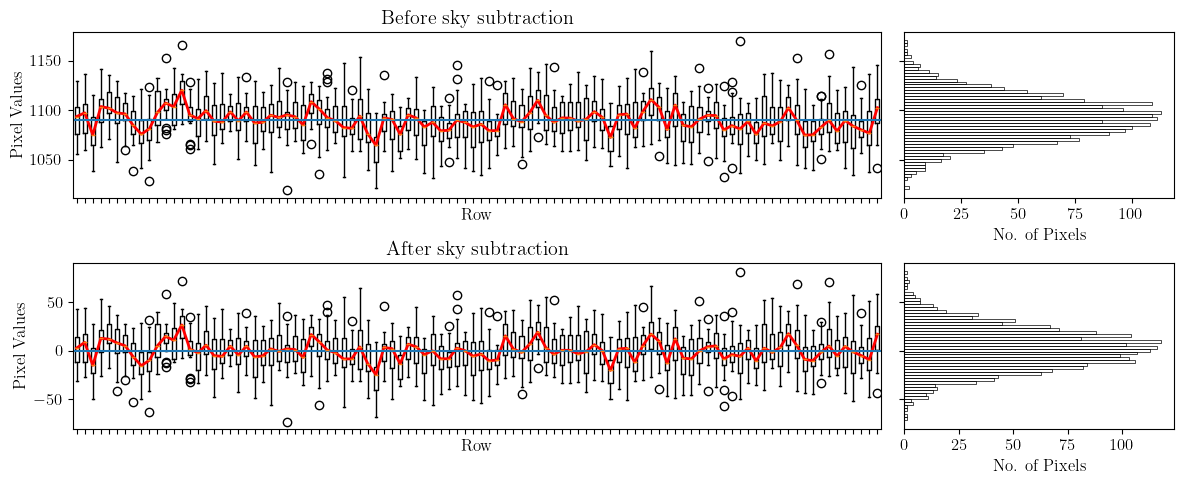

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 5), sharex=False, sharey='row',
                        gridspec_kw={'width_ratios':[3,1]})

col_orig = data[50:150, 70:90]
col_subt = skysub[50:150, 70:90]

axs[0,0].boxplot(col_orig.T)
axs[0,0].tick_params(labelbottom=False)
axs[0,0].plot(1 + np.arange(col_orig.shape[0]), np.median(col_orig, axis=1), 'r-', lw=2)
axs[0,0].axhline(np.median(col_orig))
axs[0,0].set_title("Before sky subtraction")
axs[0,0].set_xlabel("Row")
axs[0,0].set_ylabel("Pixel Values")


axs[1,0].boxplot(col_subt.T)
axs[1,0].tick_params(labelbottom=False)
axs[1,0].plot(1 + np.arange(col_subt.shape[0]), np.median(col_subt, axis=1), 'r-', lw=2)
axs[1,0].axhline(np.median(col_subt))
axs[1,0].set_title("After sky subtraction")
axs[1,0].set_xlabel("Row")
axs[1,0].set_ylabel("Pixel Values")


# axs[2,0].plot(np.median(col_orig, axis=1) - np.median(col_orig), label="Before subtraction")
# axs[2,0].plot(np.median(col_subt, axis=1) - np.median(col_subt), label="After subtraction")
# axs[2,0].plot(col_orig.ravel() - np.median(col_orig), label="Before subtraction")
# axs[2,0].plot(col_subt.ravel() - np.median(col_subt), label="After subtraction")
# axs[2,0].legend()


hist, bin_edges = np.histogram(col_orig, bins=50)
bar_cents = bin_edges[:-1] + np.ediff1d(bin_edges)
height = np.ediff1d(bin_edges)[0]
axs[0, 1].barh(bar_cents, hist, height=height, color='none', edgecolor='k', lw=0.5)
axs[0, 1].set_xlabel("No. of Pixels")

hist, bin_edges = np.histogram(col_subt, bins=50)
bar_cents = bin_edges[:-1] + np.ediff1d(bin_edges)
height = np.ediff1d(bin_edges)[0]
axs[1, 1].barh(bar_cents, hist, height=height, color='none', edgecolor='k', lw=0.5)
axs[1, 1].set_xlabel("No. of Pixels")



plt.tight_layout()